In [22]:
import numpy as np
import math
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, BatchNormalization, Activation,MaxPooling2D, Flatten,Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

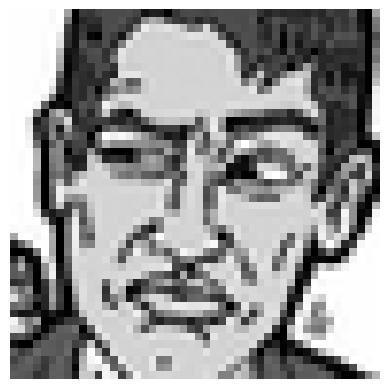

Shape: (48, 48, 3)


In [2]:
img_path = "C:/Users/asus/OneDrive/Bureau/Facial_Emotions_Detection/data/test/angry/im0.png"
img = cv.imread(img_path)                # lit l'image au format BGR
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # conversion BGR → RGB

# Afficher
plt.imshow(img)
plt.axis('off')
plt.show()

# Afficher la forme
print("Shape:", img.shape)

In [13]:
# train_data_gen = ImageDataGenerator(rescale=1./255)
# val_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_path = "C:/Users/asus/OneDrive/Bureau/Facial_Emotions_Detection/data/train"
test_path = "C:/Users/asus/OneDrive/Bureau/Facial_Emotions_Detection/data/test"

In [20]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (48,48),
    batch_size = 32,
    label_mode='categorical'
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [21]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size = (48,48),
    batch_size = 32,
    label_mode='categorical'
)

Found 7178 files belonging to 7 classes.


In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(48,48),
    batch_size=32,
    label_mode='categorical'
)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [7]:
class_name = train_data.class_names
class_name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [8]:
[len(train_data),len(test_data)]

[718, 225]

In [9]:
for image_batch, label_batch in train_data.take(1):
    print("Dtype:", image_batch.dtype)


Dtype: <dtype: 'float32'>


In [10]:
for image_batch, label_batch in train_data.take(1):
    print("Min pixel value:", tf.reduce_min(image_batch).numpy())
    print("Max pixel value:", tf.reduce_max(image_batch).numpy())


Min pixel value: 0.0
Max pixel value: 255.0


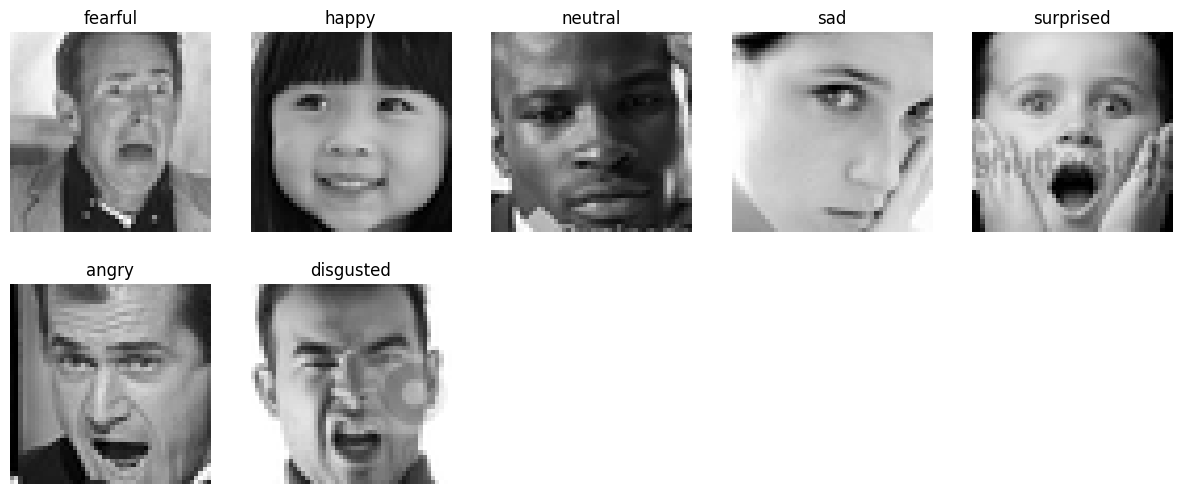

In [ ]:
num_classes = len(class_name)
affichees = [False] * num_classes

cols = min(5, num_classes)
rows = math.ceil(num_classes / cols)
plt.figure(figsize=(cols*3, rows*3))
idx = 1
for images, labels in train_data:
    for img, label in zip(images, labels):
        # détecte si c'est un one-hot ou un entier
        label_array = label.numpy()
        if label_array.ndim > 0:           # one-hot
            label_index = np.argmax(label_array)
        else:                               # entier
            label_index = int(label_array)

        if not affichees[label_index]:
            plt.subplot(rows, cols, idx)
            plt.imshow(img.numpy().astype('uint8'))
            plt.title(class_name[label_index])
            plt.axis('off')
            affichees[label_index] = True
            idx += 1
    if all(affichees):
        break



# num_classes = len(class_name)


# affichees = [False] * num_classes

# plt.figure(figsize=(num_classes * 3, 4))  


# for images, labels in train_data:
#     for img, label in zip(images, labels):
#         label = label.numpy()
#         if not affichees[label]:
#             plt.subplot(1, num_classes, label + 1)
#             plt.imshow(img.numpy().astype('uint8'))
#             plt.title(class_name[label])
#             plt.axis('off')
#             affichees[label] = True
#     if all(affichees):
#         break  #

# plt.show()

In [23]:
my_model = Sequential([

    Rescaling(1./255, input_shape=(48,48,3)),

    # range 1
    Conv2D(32,(3,3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # range 2
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # range 3
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # Classification
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')

])

c:\Users\asus\OneDrive\Bureau\Facial_Emotions_Detection\venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
my_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,511 (2.62 MB)

 Trainable params: 684,807 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [26]:
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [27]:
history = my_model.fit(
    train_data,
    validation_data = val_data,
    epochs = 20,
    callbacks = [early_stop]
)

Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 252s 345ms/step - accuracy: 0.3728 - loss: 1.6681 - val_accuracy: 0.4402 - val_loss: 1.4226
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 181s 252ms/step - accuracy: 0.4903 - loss: 1.3361 - val_accuracy: 0.4628 - val_loss: 1.3560
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 113s 158ms/step - accuracy: 0.5386 - loss: 1.2217 - val_accuracy: 0.5213 - val_loss: 1.2515
Epoch 4/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 108s 150ms/step - accuracy: 0.5690 - loss: 1.1400 - val_accuracy: 0.5191 - val_loss: 1.2798
Epoch 5/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 116s 162ms/step - accuracy: 0.6033 - loss: 1.0508 - val_accuracy: 0.5246 - val_loss: 1.2470
Epoch 6/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 98s 137ms/step - accuracy: 0.6362 - loss: 0.9672 - val_accuracy: 0.5300 - val_loss: 1.2785
Epoch 7/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 139ms/step - accuracy: 0.6701 - loss: 0.8768 - val_accuracy: 0.4999 - val_loss: 1.3765
Epoch 8/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 126s 175ms/step - accuracy: 0.7069 - 

In [28]:
# Train et validation
train_acc = history.history['accuracy']       # accuracy par epoch sur le train
val_acc = history.history['val_accuracy']     # accuracy par epoch sur la validation
train_loss = history.history['loss']          # loss par epoch sur le train
val_loss = history.history['val_loss']        # loss par epoch sur la validation

# Évaluer le dataset de test
test_loss, test_acc = my_model.evaluate(test_data, verbose=0)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


Test accuracy: 0.5409584641456604
Test loss: 1.2243245840072632


In [30]:
val_loss, val_acc = my_model.evaluate(val_data, verbose=0)
print(f"val accuracy: {val_acc}")
print(f"val loss: {val_loss}")
# Accuracy finale sur le dataset d'entraînement
final_train_acc = history.history['accuracy'][-1]
# Accuracy finale sur le dataset de validation
final_val_acc = history.history['val_accuracy'][-1] 

print(f"Accuracy finale sur le train : {final_train_acc}")
print(f"Accuracy finale sur la validation : {final_val_acc}")


val accuracy: 0.5246472954750061
val loss: 1.2470098733901978
Accuracy finale sur le train : 0.7633664011955261
Accuracy finale sur la validation : 0.5046159029006958


In [31]:
images, labels = next(iter(train_data))
print("Labels Shape:", labels.shape)
print("First few labels:", labels[:10].numpy())

Labels Shape: (32, 7)
First few labels: [[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


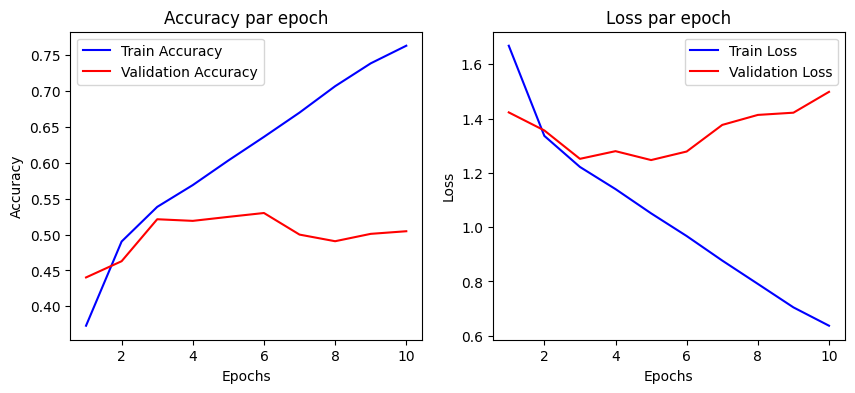

In [32]:
# -----------------------------
#  Récupérer les valeurs depuis l'objet history
# -----------------------------
acc = history.history['accuracy']             # accuracy sur le train
val_acc = history.history['val_accuracy']     # accuracy sur la validation
loss = history.history['loss']                # loss sur le train
val_loss = history.history['val_loss']        # loss sur la validation
epochs = range(1, len(acc) + 1)              # nombre d'epochs

# -----------------------------
#  Graphique de l'accuracy
# -----------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy par epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# -----------------------------
#  Graphique de la loss
# -----------------------------
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss par epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
my_model.save("my_modele.h5")